What is the process of bootstrapping?
Bootstrapping is a method in statistics that lets you estimate things like averages, variances, or other statistical measures without making too many assumptions about the population. Imagine you have a sample of data, but you want to get a better sense of the entire population that the sample came from. Bootstrapping helps you do that.

Here’s how it works:

Start with your sample (the data you collected).
Resample it, meaning you randomly pick data points from the sample with replacement. That just means after picking a point, you put it back so it could get picked again in the same "resample."
Do this many times—like thousands of times! This gives you a bunch of new samples (called “bootstrap samples”).
For each resample, you can calculate the statistic you care about (like the average or standard deviation), which gives you a distribution of that statistic. Now you have a ton of values that help you understand the range of possible outcomes.
So, bootstrapping is all about using your original data to simulate more data and figure out what the underlying population might be like.

What is the main purpose of bootstrapping?
The main purpose is to estimate the uncertainty (or variability) of a statistic from your data. Let’s say you calculated an average from your sample. You could use bootstrapping to understand how much that average could change if you had taken different samples. It’s a way to assess how reliable your result is.

Why do people use bootstrapping? It’s super useful when you don’t know much about the overall population or when you don’t want to assume things like normality (bell-curve shape of data). In cases where you can’t rely on traditional statistical formulas, bootstrapping comes to the rescue.

How could you use bootstrapping to assess whether your hypothesized guess about the population average is plausible?
Okay, so let’s say you’ve got a hunch about the average of some population (like you think the average height of all the people in a city is 5'8"). You also have a sample of data (maybe you measured the heights of 100 random people from the city). Now, you want to check if your guess (5'8") seems reasonable based on the sample.

Here’s how you can use bootstrapping:

Take your sample (the heights of 100 people).
Generate many bootstrap samples from your data (resample those 100 heights with replacement, thousands of times).
For each bootstrap sample, calculate the average height.
After doing this, you’ll have a distribution of average heights from all your bootstrap samples.
Now, look at that distribution. If your hypothesized guess (5'8") falls within the range of the bootstrap averages (say, within the 95% range), then it’s a plausible guess. If it falls way outside that range, you might start to think your guess isn’t quite right.

Bootstrapping essentially helps you see how likely it is that the population average is what you hypothesized, based on the data you’ve collected.

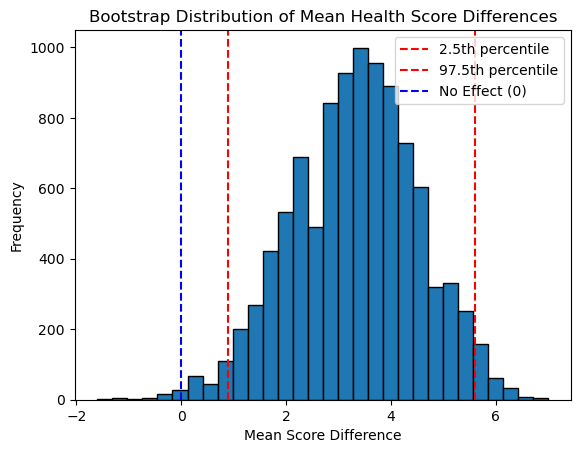

95% Confidence Interval for the Mean Difference: [0.9 5.6]
We reject the null hypothesis. The vaccine has a significant effect.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data directly in code
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the difference between the final and initial health scores
data['ScoreDiff'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping process
np.random.seed(42)  # Make results reproducible
n_iterations = 10000  # Number of bootstrap samples
boot_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    boot_sample = np.random.choice(data['ScoreDiff'], size=len(data), replace=True)
    boot_means.append(np.mean(boot_sample))

# Calculate the 95% confidence interval
conf_interval = np.percentile(boot_means, [2.5, 97.5])

# Visualization of the bootstrap distribution
plt.hist(boot_means, bins=30, edgecolor='k')
plt.axvline(x=conf_interval[0], color='r', linestyle='--', label='2.5th percentile')
plt.axvline(x=conf_interval[1], color='r', linestyle='--', label='97.5th percentile')
plt.axvline(x=0, color='blue', linestyle='--', label='No Effect (0)')
plt.legend()
plt.title('Bootstrap Distribution of Mean Health Score Differences')
plt.xlabel('Mean Score Difference')
plt.ylabel('Frequency')
plt.show()

# Output the confidence interval
print(f'95% Confidence Interval for the Mean Difference: {conf_interval}')

# Conclusion: Is 0 within the confidence interval?
if conf_interval[0] > 0 or conf_interval[1] < 0:
    print("We reject the null hypothesis. The vaccine has a significant effect.")
else:
    print("We fail to reject the null hypothesis. The vaccine's effect is not significant.")



In [ ]:
https://chatgpt.com/share/66fe0a18-a960-8007-8829-49ef1163ea6e
    